# Using AirPassanger data perform the following: 

- 1) Build the ARIMA model to forecast the number of passenger training by airlines for next 2 years. (10 Marks)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [20]:
df = pd.read_csv('F:\Skillenable\Data frames\AirPassengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [21]:
df.shape

(144, 2)

In [22]:
df.info()  # no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [23]:
def parse(x):                         # object to datetype
    return datetime.strftime(x, '%m%d%Y')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [25]:
df = pd.read_csv('F:\Skillenable\Data frames\AirPassengers.csv',
                parse_dates=['Month'], keep_date_col= False)
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [26]:
## descriptive statistics
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [27]:
#set index
df.set_index('Month', inplace=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

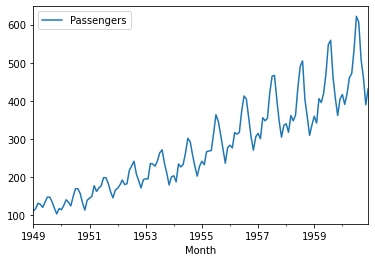

In [28]:
# Test stationarity
df.plot()   # trend is not stationary

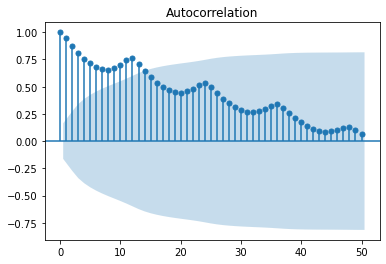

In [30]:
# ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(df.Passengers, lags=50)

In [31]:
# decay in the plot, it can be an autoregrassive

In [32]:
# convert to stationary
pass_diff = df.diff(periods=1)   
pass_diff.head()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


In [33]:
pass_diff = pass_diff[1:] #  remove 1st nan value 
pass_diff.head()

,Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0


In [42]:
log_ts = np.log(pass_diff)

log_ts.head()

,Passengers
Month,
1949-02-01,1.791759
1949-03-01,2.639057
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,2.639057


<AxesSubplot:xlabel='Month'>

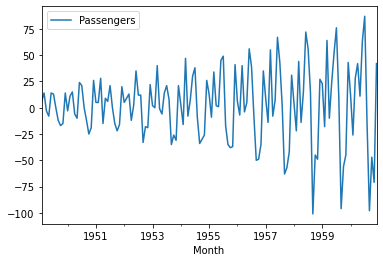

In [43]:
pass_diff.plot() # plot is now stationary

In [45]:
# Building the model ARIMA

# Step1: spliting the data train and test (80:20)

X = df.values
train = X[0:30]      # defining training data
test = X[30:]        # defining test data
prediction=[]



In [46]:
from statsmodels.tsa.arima_model import ARIMA


In [47]:
model_ma = ARIMA(pass_diff, order = (0,2,1))


C:\Users\arun\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\arun\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

In [48]:
summary_model = model_ma.fit(disp = False)

summary_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D2.Passengers   No. Observations:                  141
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -722.158
Method:                       css-mle   S.D. of innovations             39.852
Date:                Wed, 23 Feb 2022   AIC                           1450.316
Time:                        12:16:48   BIC                           1459.162
Sample:                    04-01-1949   HQIC                          1453.910
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0130      0.082      0.160      0.873      -0.147       0.173
ma.L1.D2.Passengers    -1.0000      0.018    -56.901      0.000      -1.034      -0.966
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

### We want to forecast the value for next 2 years, with a moving average window of 2 months and thus I will be forecasting over all 144 + 60 data points (204)

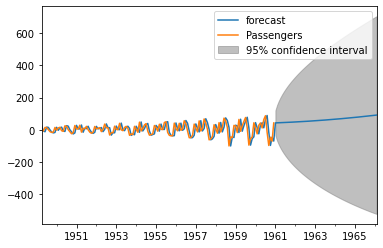

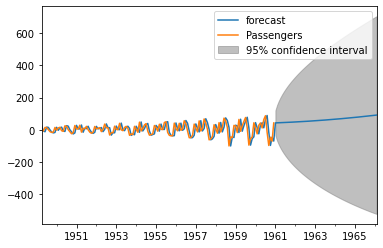

In [49]:
# Predict the values

summary_model.plot_predict(2,204)